In [1]:
import requests
import json
import pandas as pd
import numpy as np
from config import bls_api_key
import matplotlib.pyplot as plt
import scipy.stats as st 
import matplotlib.patches as mpatches
from sklearn import datasets



In [2]:
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"content-type": "application/json"}

target_series = ["LNS14000000","LNS14000000","LNS14000001","LNS14000002","LNS14000003","LNS14000006",
                 "LNS14032183","LNS14000009", ]



parameters = json.dumps({"seriesid": target_series,
             "startyear": "2006",
             "endyear": "2018",
             "registrationkey": bls_api_key})

p = requests.post(url, data=parameters, headers=headers)

json_data = json.loads(p.text)

json_data

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 573,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS14000000',
    'data': [{'year': '2018',
      'period': 'M12',
      'periodName': 'December',
      'value': '3.9',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M11',
      'periodName': 'November',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M10',
      'periodName': 'October',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M09',
      'periodName': 'September',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M08',
      'periodName': 'August',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M07',
      'periodName': 'July',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M06',
      'periodName': 'June',
      'value': '4.0',
      'footnotes': [{}]},
     

In [3]:
years = []
months = []

for data_point in np.arange(len(json_data["Results"]["series"][0]["data"])):
        years.append(json_data["Results"]["series"][0]["data"][data_point]["year"])
        months.append(json_data["Results"]["series"][0]["data"][data_point]["periodName"])

In [4]:
unemployment_agedf = pd.DataFrame({"years": years,
                           "months": months,
                           "LNS14000000":"", 
                           "LNS14000000":"", 
                           "LNS14000001":"", 
                           "LNS14000002":"", 
                           "LNS14000003":"", 
                           "LNS14000006":"", 
                           "LNS14032183":"", 
                           "LNS14000009":"",
                                             })
unemployment_agedf.head()

,years,months,LNS14000000,LNS14000001,LNS14000002,LNS14000003,LNS14000006,LNS14032183,LNS14000009
0,2018,December,,,,,,,
1,2018,November,,,,,,,
2,2018,October,,,,,,,
3,2018,September,,,,,,,
4,2018,August,,,,,,,


In [5]:
for series in np.arange(len(json_data["Results"]["series"])):
    for data_point in np.arange(len(json_data["Results"]["series"][series]["data"])):
        unemployment_agedf.loc[data_point, json_data["Results"]["series"][series]["seriesID"]] = json_data["Results"]["series"][series]["data"][data_point]["value"]

In [6]:

#for column in unemployment_agedf.columns[3:]:
 #   unemployment_agedf[f"{column}"] = unemployment_agedf[f"{column}"].astype(int)



unemployment_agedf.rename(columns={"LNS14000000":"Unemployment, 16yo and over",
                           "LNS14000001": "Unemployment, Men 16yo and over",
                           "LNS14000002": "Unemployment, Women 16yo and over",
                           "LNS14000003": "Unemployment, White people 16yo and over",
                           "LNS14000006": "Unemployment, African Americans 16yo and over",
                           "LNS14032183": "Unemployment, Asian people 16yo and over",
                           "LNS14000009": "Unemployment, Hispanic people 16yo and over"},
                                              inplace=True)
unemployment_agedf.reset_index(drop=True, inplace=True)

unemployment_agedf.sort_values(by="years", ascending=True, inplace=True)
unemployment_agedf = unemployment_agedf.drop(["months"],axis=1)

unemployment_agedf.head()

,years,"Unemployment, 16yo and over","Unemployment, Men 16yo and over","Unemployment, Women 16yo and over","Unemployment, White people 16yo and over","Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"
155,2006,4.7,4.6,4.8,4.1,8.9,3.0,5.5
144,2006,4.4,4.5,4.4,3.9,8.3,2.5,5.0
145,2006,4.5,4.5,4.5,4.0,8.5,3.1,5.1
146,2006,4.4,4.4,4.4,3.9,8.4,2.8,4.8
147,2006,4.5,4.4,4.7,3.9,9.0,3.0,5.5


In [7]:


columns=["years","Unemployment, 16yo and over","Unemployment, Men 16yo and over","Unemployment, Women 16yo and over","Unemployment, White people 16yo and over",
                 "Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"]

unemployment_agedf[columns] = unemployment_agedf[columns].astype(float)


In [8]:
age = unemployment_agedf[["years","Unemployment, 16yo and over", "Unemployment, Men 16yo and over", "Unemployment, Women 16yo and over", "Unemployment, White people 16yo and over",
                                  "Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"]]


year_groupby= age.groupby('years')["Unemployment, 16yo and over", "Unemployment, Men 16yo and over", "Unemployment, Women 16yo and over", "Unemployment, White people 16yo and over",
                                   "Unemployment, African Americans 16yo and over", "Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"].mean()
year_groupby

,"Unemployment, 16yo and over","Unemployment, Men 16yo and over","Unemployment, Women 16yo and over","Unemployment, White people 16yo and over","Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"
years,,,,,,,
2006.0,4.608333,4.608333,4.616667,4.033333,8.950000,3.050000,5.225000
2007.0,4.616667,4.725000,4.500000,4.116667,8.258333,3.233333,5.641667
2008.0,5.800000,6.141667,5.425000,5.191667,10.100000,3.950000,7.616667
2009.0,9.283333,10.325000,8.075000,8.491667,14.783333,7.291667,12.083333
2010.0,9.608333,10.491667,8.625000,8.716667,15.958333,7.500000,12.491667
2011.0,8.933333,9.366667,8.458333,7.933333,15.825000,7.016667,11.491667
2012.0,8.075000,8.216667,7.883333,7.191667,13.825000,5.900000,10.316667
2013.0,7.358333,7.633333,7.075000,6.508333,13.066667,5.225000,9.108333
2014.0,6.158333,6.258333,6.050000,5.300000,11.341667,4.983333,7.400000


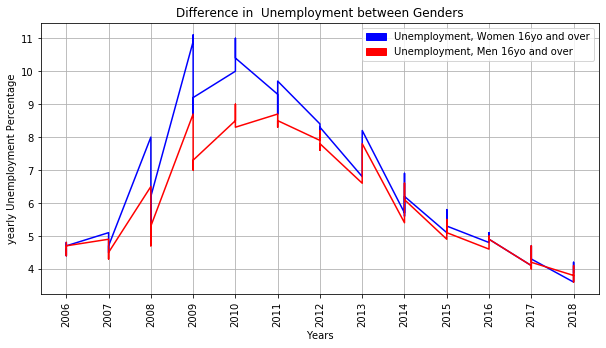

In [9]:
#unemployment between Genders
plt.figure(figsize=(10,5))
unemployment_men  = plt.plot(unemployment_agedf['years'], unemployment_agedf['Unemployment, Men 16yo and over'], color='blue')
unemployment_women = plt.plot(unemployment_agedf['years'], unemployment_agedf['Unemployment, Women 16yo and over'], color='red')

red_glabel = mpatches.Patch(color='red', label='Unemployment, Men 16yo and over')
blue_glabel = mpatches.Patch(color='blue', label='Unemployment, Women 16yo and over')

plt.legend(handles=[blue_glabel, red_glabel])
plt.title('Difference in  Unemployment between Genders')
plt.ylabel('yearly Unemployment Percentage')
plt.xlabel('Years')
plt.grid()
plt.xticks(unemployment_agedf['years'][::12], rotation='vertical')
plt.show()

In [10]:
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"content-type": "application/json"}

target_series = ["LNS14024887","LNS14000036","LNS14000037", "LNS14000038","LNS14000089","LNS14000164", "LNS14000327",
                 "LNS14000091","LNS14000173","LNS14000334", "LNS14000093","LNS14000182","LNS14000341", "LNS14024230",          
                 "LNS14024231","LNS14024232","LNS14000048", "LNS14000050" ]             
                                 
                                 
                                  
parameters = json.dumps({"seriesid": target_series,
             "startyear": "2006",
             "endyear": "2018",
             "registrationkey": bls_api_key})

p = requests.post(url, data=parameters, headers=headers)

json_data = json.loads(p.text)

json_data                        


{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 1280,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS14024887',
    'data': [{'year': '2018',
      'period': 'M12',
      'periodName': 'December',
      'value': '8.7',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M11',
      'periodName': 'November',
      'value': '8.2',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M10',
      'periodName': 'October',
      'value': '8.4',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M09',
      'periodName': 'September',
      'value': '8.6',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M08',
      'periodName': 'August',
      'value': '8.5',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M07',
      'periodName': 'July',
      'value': '8.6',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M06',
      'periodName': 'June',
      'value': '8.9',
      'footnotes': [{}]},
    

In [11]:
years = []
months = []

for data_point in np.arange(len(json_data["Results"]["series"][0]["data"])):
        years.append(json_data["Results"]["series"][0]["data"][data_point]["year"])
        months.append(json_data["Results"]["series"][0]["data"][data_point]["periodName"])

In [12]:



layoff_agedf = pd.DataFrame({"years": years,
                           "months": months,
                          "LNS14024887": "",
                          "LNS14000036": "",
                          "LNS14000037": "",
                          "LNS14000038": "",
                          "LNS14000089": "",
                          "LNS14000164": "",
                          "LNS14000327": "",
                          "LNS14000091": "",
                          "LNS14000173": "",
                          "LNS14000334": "",
                          "LNS14000093": "",
                          "LNS14000182": "",
                          "LNS14000341": "",
                          "LNS14024230": "",
                          "LNS14024231": "",
                          "LNS14024232": "",
                          "LNS14000048": "",
                          "LNS14000049": "",
                          "LNS14000050": ""})
                            
layoff_agedf.head()

,years,months,LNS14024887,LNS14000036,LNS14000037,LNS14000038,LNS14000089,LNS14000164,LNS14000327,LNS14000091,...,LNS14000334,LNS14000093,LNS14000182,LNS14000341,LNS14024230,LNS14024231,LNS14024232,LNS14000048,LNS14000049,LNS14000050
0,2018,December,,,,,,,,,...,,,,,,,,,,
1,2018,November,,,,,,,,,...,,,,,,,,,,
2,2018,October,,,,,,,,,...,,,,,,,,,,
3,2018,September,,,,,,,,,...,,,,,,,,,,
4,2018,August,,,,,,,,,...,,,,,,,,,,


In [13]:
for series in np.arange(len(json_data["Results"]["series"])):
    for data_point in np.arange(len(json_data["Results"]["series"][series]["data"])):
        layoff_agedf.loc[data_point, json_data["Results"]["series"][series]["seriesID"]] = json_data["Results"]["series"][series]["data"][data_point]["value"]

In [14]:
layoff_agedf = layoff_agedf.drop(["months"],axis=1)

for column in layoff_agedf.columns:
    layoff_agedf[f"{column}"] = pd.to_numeric(layoff_agedf[f"{column}"])




layoff_agedf.rename(columns={"LNS14024887": "Unemployment Rate, 16-24yo",
                              "LNS14000036": "Unemployment Rate, 20-24yo",
                              "LNS14000037": "Unemployment Rate, Men, 20-24yo",
                              "LNS14000038": "Unemployment Rate, Women, 20-24yo",
                              "LNS14000089": "Unemployment Rate, 25-34yo",
                              "LNS14000164": "Unemployment Rate, Men, 25-34yo",
                              "LNS14000327": "Unemployment Rate, Women, 25-34yo",
                              "LNS14000091": "Unemployment Rate, 35-44yo",
                              "LNS14000173": "Unemployment Rate, Men, 35-44yo",
                              "LNS14000334": "Unemployment Rate, Women, 35-44yo",
                              "LNS14000093": "Unemployment Rate, 45-54yo",
                              "LNS14000182": "Unemployment Rate, Men, 45-54yo",
                              "LNS14000341": "Unemployment Rate, Women, 45-54yo",
                              "LNS14024230": "Unemployment Rate, 55yo and over",
                              "LNS14024231": "Unemployment Rate, Men, 55yo and over",
                              "LNS14024232": "Unemployment Rate, Women, 55yo and over",
                              "LNS14000048": "Unemployment Rate, 25yo and over",
                              "LNS14000049": "Unemployment Rate, Men, 25yo and over",
                              "LNS14000050": "Unemployment Rate, Women, 25yo and over"},

     inplace=True)
layoff_agedf.reset_index(drop=True, inplace=True)

layoff_agedf.sort_values(by="years", ascending=True, inplace=True)



layoff_agedf.head()                         

,years,"Unemployment Rate, 16-24yo","Unemployment Rate, 20-24yo","Unemployment Rate, Men, 20-24yo","Unemployment Rate, Women, 20-24yo","Unemployment Rate, 25-34yo","Unemployment Rate, Men, 25-34yo","Unemployment Rate, Women, 25-34yo","Unemployment Rate, 35-44yo","Unemployment Rate, Men, 35-44yo","Unemployment Rate, Women, 35-44yo","Unemployment Rate, 45-54yo","Unemployment Rate, Men, 45-54yo","Unemployment Rate, Women, 45-54yo","Unemployment Rate, 55yo and over","Unemployment Rate, Men, 55yo and over","Unemployment Rate, Women, 55yo and over","Unemployment Rate, 25yo and over","Unemployment Rate, Men, 25yo and over","Unemployment Rate, Women, 25yo and over"
155,2006,10.4,8.2,8.9,7.3,4.6,4.3,5.1,3.7,3.2,4.2,3.2,3.3,3.2,3.1,3.2,3.1,3.7,NaN,3.9
144,2006,10.0,7.8,8.1,7.4,4.3,4.2,4.4,3.7,3.5,3.9,2.9,2.8,2.9,3.0,3.2,2.7,3.5,NaN,3.5
145,2006,10.6,8.5,8.9,8.1,4.4,4.5,4.4,3.5,3.4,3.6,2.8,2.6,3.1,3.0,3.0,3.1,3.5,NaN,3.6
146,2006,10.6,8.4,8.8,8.0,4.6,4.6,4.7,2.9,2.7,3.1,2.7,2.6,2.9,3.0,2.9,3.0,3.3,NaN,3.4
147,2006,10.6,7.9,8.4,7.4,4.5,4.0,5.2,3.5,3.3,3.6,3.0,2.8,3.2,2.9,2.6,3.2,3.5,NaN,3.8


In [15]:
layoff_agedf.to_csv("layoff_agedf.csv")

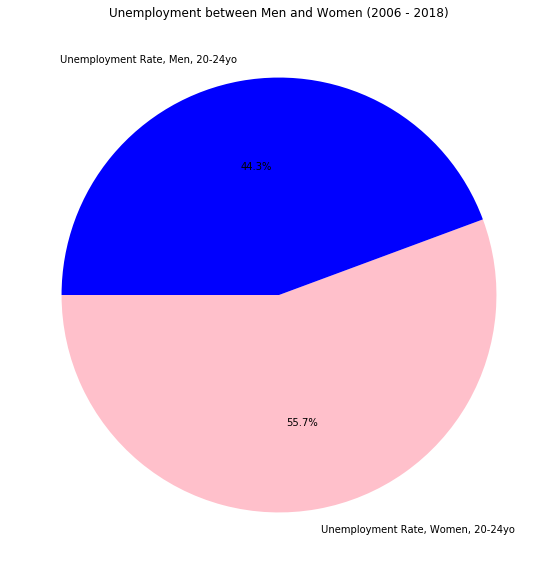

In [37]:
Unemployment_Men = layoff_agedf['Unemployment Rate, Men, 20-24yo'].sum()
Unemployment_Women = layoff_agedf['Unemployment Rate, Women, 20-24yo'].sum()

layofflabels = ['Unemployment Rate, Women, 20-24yo', 'Unemployment Rate, Men, 20-24yo'] 
layoffsplit = [Unemployment_Men, Unemployment_Women]
layoffcolors = ['pink', 'blue']
plt.figure(figsize=(10, 10))
plt.pie(layoffsplit, labels=layofflabels, colors=layoffcolors,
        autopct="%1.1f%%", startangle=180)
plt.title("Unemployment between Men and Women (2006 - 2018)")
plt.show()

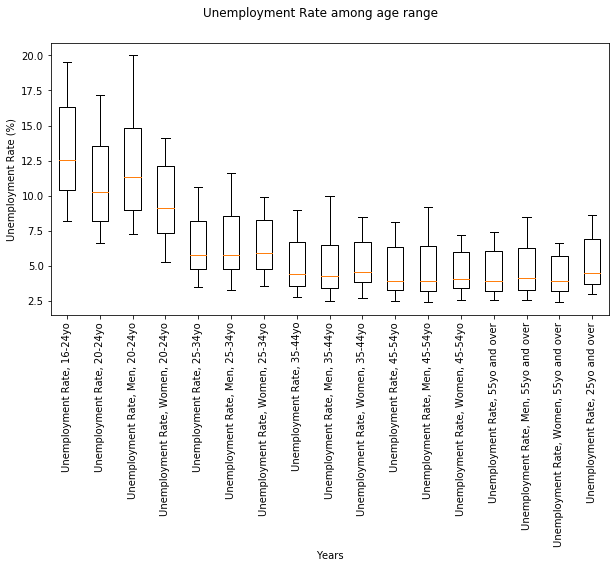

In [17]:
layoff_agedf = pd.read_csv("layoff_agedf.csv")

fig, ax1 = plt.subplots(sharey=True, figsize=(10,5))

fig.suptitle("Unemployment Rate among age range")

ax1.boxplot([layoff_agedf[f"{year}"] for year in layoff_agedf.iloc[:,2:-2].columns])
ax1.set_ylabel("Unemployment Rate (%)")
ax1.set_xticklabels(layoff_agedf.iloc[:,2:].columns, rotation="vertical")
ax1.set_xlabel("Years")

plt.savefig("layoff_agedf")

plt.show()

In [18]:
pies = ["Unemployment Rate, 16-24yo","Unemployment Rate, 20-24yo","Unemployment Rate, Men, 20-24yo",
        "Unemployment Rate, Women, 20-24yo","Unemployment Rate, 25-34yo","Unemployment Rate, Men, 25-34yo",
        "Unemployment Rate, Women, 25-34yo","Unemployment Rate, 35-44yo","Unemployment Rate, Men, 35-44yo",
        "Unemployment Rate, Women, 35-44yo","Unemployment Rate, 45-54yo","Unemployment Rate, Men, 45-54yo",
        "Unemployment Rate, Women, 45-54yo","Unemployment Rate, 55yo and over","Unemployment Rate, Men, 55yo and over",
        "Unemployment Rate, Women, 55yo and over","Unemployment Rate, 25yo and over","Unemployment Rate, Men, 25yo and over",
        "Unemployment Rate, Women, 25yo and over"] 
pie_votes = [47,37,32,27,25,24,24,21,18,16]

colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)

In [19]:
# pies = [layoff_agedf]
# pie_votes=[layoff_agedf]
# colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","blue"," black",
#            ,"white", "deeppink","lightsalmon","bluevoilet","Indigo","peru"]
# explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

In [20]:
from pandas import DataFrame
import matplotlib.pyplot as plt

Data = {'Tasks': [300,500,700]}
layoff_agedf = layoff_agedf(Data,columns=["Unemployment Rate, 16-24yo","Unemployment Rate, 20-24yo","Unemployment Rate, Men, 20-24yo",
              "Unemployment Rate, Women, 20-24yo","Unemployment Rate, 25-34yo","Unemployment Rate, Men, 25-34yo",
              "Unemployment Rate, Women, 25-34yo","Unemployment Rate, 35-44yo","Unemployment Rate, Men, 35-44yo",
              "Unemployment Rate, Women, 35-44yo","Unemployment Rate, 45-54yo","Unemployment Rate, Men, 45-54yo",
              "Unemployment Rate, Women, 45-54yo","Unemployment Rate, 55yo and over","Unemployment Rate, Men, 55yo and over",
              "Unemployment Rate, Women, 55yo and over","Unemployment Rate, 25yo and over","Unemployment Rate, Men, 25yo and over",
              "Unemployment Rate, Women, 25yo and over"]
                            
my_labels =   "Unemployment Rate, 16-24yo","Unemployment Rate, 20-24yo","Unemployment Rate, Men, 20-24yo",
              "Unemployment Rate, Women, 20-24yo","Unemployment Rate, 25-34yo","Unemployment Rate, Men, 25-34yo",
              "Unemployment Rate, Women, 25-34yo","Unemployment Rate, 35-44yo","Unemployment Rate, Men, 35-44yo",
              "Unemployment Rate, Women, 35-44yo","Unemployment Rate, 45-54yo","Unemployment Rate, Men, 45-54yo",
              "Unemployment Rate, Women, 45-54yo","Unemployment Rate, 55yo and over","Unemployment Rate, Men, 55yo and over",
              "Unemployment Rate, Women, 55yo and over","Unemployment Rate, 25yo and over","Unemployment Rate, Men, 25yo and over",
              "Unemployment Rate, Women, 25yo and over" 
                            
my_colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","blue"," black",
             "white", "deeppink","lightsalmon","bluevoilet","Indigo","peru"]   
my_explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)


SyntaxError: invalid syntax (<ipython-input-20-1014ee1970ce>, line 13)

In [21]:
plt.pie(layoff_agedf, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

NameError: name 'my_labels' is not defined

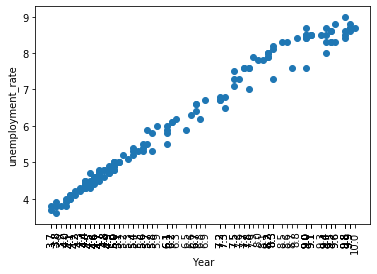

In [22]:
# Generate a scatter plot of years
years = unemployment_agedf.iloc[:,1]
unemployment_rate = unemployment_agedf.iloc[:,3]
plt.scatter(years,unemployment_rate)
plt.xticks(years,rotation= 90)
plt.xlabel('Year')
plt.ylabel('unemployment_rate')
plt.show()

In [ ]:
unemployment_agedf.to_csv("unemployment_agedf.csv")

Text(0.5, 1.0, 'Unemployment Between Races')

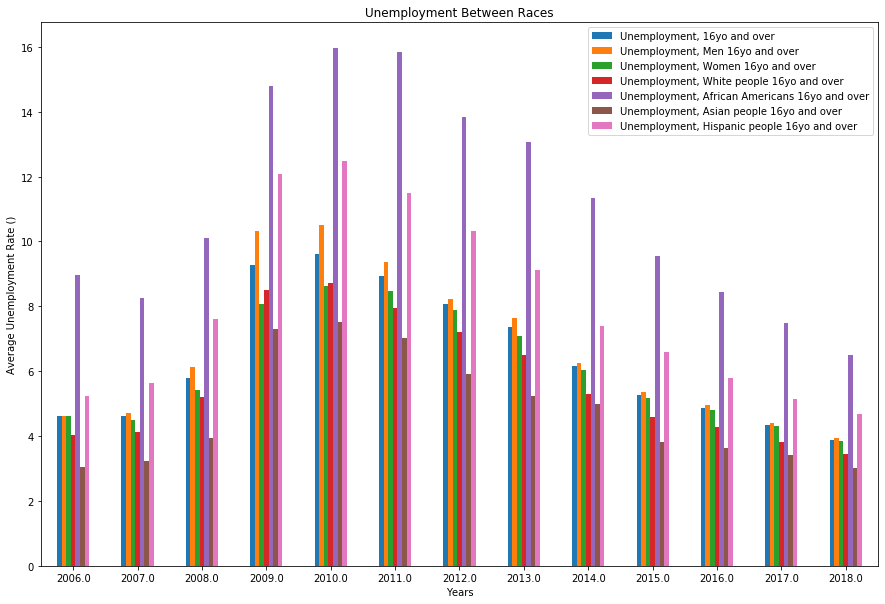

In [23]:
#Bar chart for unemployment
year_groupby.plot.bar(rot=0, figsize=(15, 10))
plt.xlabel("Years")
plt.ylabel("Average Unemployment Rate ()")
plt.title("Unemployment Between Races")

In [ ]:
# change_inunemployment_rate = unemployment_agedf.[unemployment_agedf]
# change_inunemployment_rate.sort_values(['years'],inplace= True)
# change_inunemployment_rate.head()

In [ ]:
# change_inunemployment_rate['Unemployment, 16yo and over'] = change_inunemployment_rate['Unemployment, 16yo and over'].astype('float64')

In [ ]:
unemployment_agedf.to_csv("unemployment_agedf.csv") index= False

In [ ]:
# change_inunemployment_rate = change_inunemployment_rate.drop(columns=["months", "years"])
# change_inunemployment_rate =df
# row_1 = change_inunemployment_rate.iloc[0]
# row_2 = change_inunemployment_rate.iloc[1]
# diff = row_2 - row_1
# print(diff)
# change_inunemployment_rate.head()

In [ ]:

#for i in range((change_inunemployment_rate.shape[0]-1)):
    #row_1 = change_inunemployment_rate.iloc[i]
    #row_2 = change_inunemployment_rate.iloc[i+1]
    #diff = row_2 - row_1
#change_inunemployment_rate[i,] = diff
#change_inunemployment_rate.head()

In [ ]:
# Create a list of the years that we will use as our x axis
#years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
#Unemployment_Men_16yo_and_over=[]
#Unemployment_Women_16yo_and_over=[]
# Plot our line that will be used to track 
#plt.plot(years, Unemployment_Men_16yo_and_over, color="green", label="Unemployment_Men_16yo_and_over")

# Plot our line that will be used to track 
#plt.plot(years, Unemployment_Women_16yo_and_over, color="blue", label="Unemployment_Women_16yo_and_over")

# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best")

#plt.title(gender_name + "'s Recent Career")
##plt.xlabel("Years")
#plt.ylabel("Unemployment Men vs Women")

# Print our chart to the screen
#plt.show()

In [ ]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,5))

#fig
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, African Americans 16yo and over"], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, White people 16yo and over"], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, Asian people 16yo and over"], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, Hispanic people 16yo and over"], yerr=None, linestyle="--", fmt='o')

plt.ylabel('Rate')
plt.xlabel('Time(months)')
plt.title('Unemployment among the race')
plt.grid()
      
plt.show()

In [ ]:
unemployment_agedf.to_csv("unemployment_agedf.csv")